# Wine Dataset Analysis

In [1]:
# Import the Required Libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [2]:
# Read the csv file
input_file = "/Users/deepak/Documents/DAEN/CS 504/Assignment 4/wine.csv"
df = pd.read_csv(input_file, header = 0)

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


#  1. Data Pre Processing
###     1.1 Let us add the headers to the dataset

In [4]:
df.columns = [  'name'
                 ,'alcohol'
                 ,'malicAcid'
                 ,'ash'
                 ,'ashalcalinity'
                 ,'magnesium'
                 ,'totalPhenols'
                 ,'flavanoids'
                 ,'nonFlavanoidPhenols'
                 ,'proanthocyanins'
                 ,'colorIntensity'
                 ,'hue'
                 ,'od280_od315'
                 ,'proline'
                ]


In [5]:
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### 1.2 Checking for Missing Values

In [6]:
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

#### There is no missing values in the Datasets 

# 1.3 Check for Outliers

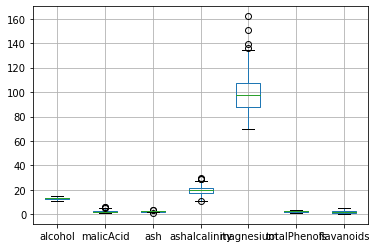

In [7]:
boxplot_1 = df.boxplot(column=['alcohol', 'malicAcid', 'ash','ashalcalinity','magnesium','totalPhenols','flavanoids'])

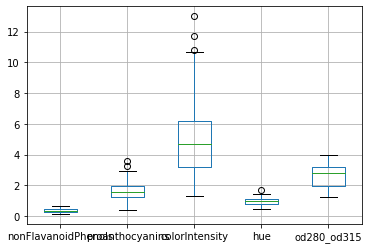

In [8]:
boxplot_2 = df.boxplot(column=['nonFlavanoidPhenols', 'proanthocyanins','colorIntensity','hue','od280_od315'])

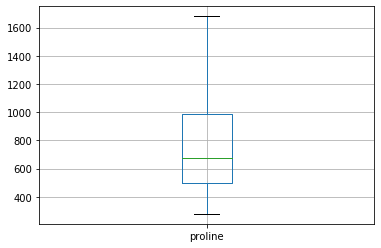

In [9]:
boxplot_3 = df.boxplot(column=['proline'])

### From the box plot it can be seen that there are certain varaibles such as colorIntensity ,proanthocyanins etc with outliers. Let us now calculate the z-score and remove the outliers

In [10]:
z = np.abs(stats.zscore(df))
print(z)

[[1.22246766 0.2558245  0.50162433 ... 0.40709978 1.13169801 0.97105248]
 [1.22246766 0.20622873 0.01802001 ... 0.3195674  0.80457911 1.40099798]
 [1.22246766 1.70650069 0.34931478 ... 0.4244579  1.20281081 2.34050852]
 ...
 [1.36887097 0.34261709 1.73822194 ... 1.60614514 1.48525319 0.28632445]
 [1.36887097 0.21862767 0.22408586 ... 1.56237895 1.39991783 0.30224836]
 [1.36887097 1.40892609 1.57695301 ... 1.51861275 1.42836295 0.58949046]]


### Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [11]:
threshold = 3
print(np.where(z > 3))
#The below arrow denotes the row and column numbers with outliers

(array([ 24,  58,  68,  72,  94, 109, 114, 120, 120, 122, 157]), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10]))


In [12]:
# Let us now remove the Outliers by setting a threshold of 3
df_Outlier_Rm = df[(z < 3).all(axis=1)]

### Let us now comapre the original data frame and the data frame after removing outliers

In [13]:
print(df.shape)
print(df_Outlier_Rm.shape)

(177, 14)
(167, 14)


#### It can be seen from the above output that new data frame had 10 records removed from the following varaibles ash,ashalcalinity,magnesium,colorIntensity,hue,od280_od315

# 1.4 Scaling the Data

In [14]:
X = np.array(df_Outlier_Rm[['alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols',
                           'proanthocyanins','colorIntensity','hue','od280_od315','proline']])
Y = np.array(df_Outlier_Rm['name'])

In [15]:
scaler = StandardScaler()
#fitting scaler to the feature
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
#Use the .transform() method to transform the features into a scaled version.
scaled_features = scaler.transform(X)

In [17]:
#Converting the scaled features to a dataframe and check the dataframe to make sure the scaling worked.
df_feat = pd.DataFrame(scaled_features) 
df_feat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.220856,-0.517329,-0.941214,-2.635682,0.112324,0.605147,0.769990,-0.833568,-0.510459,-0.327073,0.450540,1.147246,0.939194
1,0.170071,0.011520,1.238453,-0.252441,0.193177,0.844549,1.258881,-0.510397,2.395679,0.252533,0.359802,0.822014,1.363253
2,1.706333,-0.362321,0.539314,-0.832148,1.163420,2.520363,1.513511,-0.995154,1.199034,1.197739,-0.411474,1.217949,2.289901
3,0.271642,0.221237,2.060968,0.520502,1.567688,0.844549,0.698694,0.216737,0.515236,-0.353825,0.405171,0.482641,-0.050278
4,1.490495,-0.535565,0.333685,-1.347444,1.082567,1.594675,1.411659,-0.187226,0.800152,0.729595,0.450540,0.369517,2.195665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.868372,3.011372,0.333685,0.359473,-0.291944,-0.942986,-1.419832,1.267043,-0.928335,1.153153,-1.409595,-1.200083,-0.034572
163,0.474784,1.424824,0.457063,1.164622,0.274031,-0.751464,-1.277239,0.539909,-0.263533,0.974813,-1.137380,-1.454612,-0.003160
164,0.309731,1.762194,-0.447705,0.198443,1.729395,-1.086627,-1.338350,0.539909,-0.377499,2.267782,-1.636441,-1.454612,0.263840
165,0.182767,0.221237,0.004679,0.198443,1.729395,-0.990866,-1.348535,1.347836,-0.168561,1.866516,-1.591072,-1.369769,0.279546


### 2 .  Let us now Split the dataset into Train and Test

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)


(125, 13)
(42, 13)


#  Model 1 : Decision tree

In [19]:
# Using a Decision Tree
# With Gini as the impurity measure
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
tree.fit(X_train, Y_train)
yPredTree = tree.predict(X_test)

In [20]:
# Accuarcy Score
score = accuracy_score(Y_test,yPredTree)
print(score)

0.9761904761904762


###  The accuarcy of the Decision Tree is 97.16%

###  Model 1 : Decision tree with 10- fold Cross Validation

In [21]:
# Cross validate the Tree
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(tree, X, Y, cv=kfold, scoring='accuracy')

In [23]:
print(np.mean(cv_results))

0.8669117647058823


###  The accuarcy of the 10-fold Decision Tree is approx 87%

# Model 2 : Random Forest

In [24]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)
yPredRFTree = clf.predict(X_test)

In [25]:
# Accuarcy Score
score = accuracy_score(Y_test,yPredRFTree)
print(score)

1.0


###  The accuarcy of the Random Forest is 100%

In [27]:
# Cross validate the Tree
kfold = KFold(n_splits=10, random_state=0)
cv_results = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')

In [28]:
print(np.mean(cv_results))

0.9702205882352942


###  The accuarcy of the 10-fold Random Forest is approx 97%

## Comparison
### The 10-fold Random Forest performs better than the 10-fold Decison Tree Model

# Model 3 : KNN

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(125, 13)
(42, 13)


In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [31]:
# making prediction
y_pred = knn.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9761904761904762


###  The accuarcy of the KNN is 97.6%

##  Model 3 : KNN with 10-fold cross validation

In [33]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=10)

In [34]:
#train model with cv of 10 
cv_scores = cross_val_score(knn_cv, scaled_features, Y, cv=10)

In [35]:
#print each cv score (accuracy) and average them
print(cv_scores)

[0.94444444 0.94444444 0.94444444 0.94117647 1.         0.94117647
 1.         1.         0.93333333 1.        ]


In [36]:
print(np.mean(cv_scores))

0.9649019607843137


###  The accuarcy of the KNN is 96.4%

Write a for loop to run KNN with K values ranging from 1 to 50 and see if the value of K
makes a substantial difference. Make a note of the best accuracy you could get out of KNN measured by 10-fold cross validation.

In [37]:
k_range=range(1,51) # Range 1 to 50 means the value of K varies from 1 to 50
scores={}
scores_list=[]

for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, scaled_features, Y, cv=10)
    scores[k]= np.mean(cv_scores)
    scores_list.append(np.mean(cv_scores))

In [38]:
scores

{1: 0.9537908496732026,
 2: 0.9479084967320262,
 3: 0.9593464052287581,
 4: 0.9652287581699346,
 5: 0.9707843137254901,
 6: 0.9766666666666666,
 7: 0.9649019607843137,
 8: 0.9649019607843137,
 9: 0.9652287581699346,
 10: 0.9649019607843137,
 11: 0.9763398692810457,
 12: 0.9763398692810457,
 13: 0.976013071895425,
 14: 0.9649019607843137,
 15: 0.9704575163398692,
 16: 0.9718954248366014,
 17: 0.9774509803921567,
 18: 0.9774509803921567,
 19: 0.9774509803921567,
 20: 0.9718954248366014,
 21: 0.9774509803921567,
 22: 0.9774509803921567,
 23: 0.9830065359477125,
 24: 0.9830065359477125,
 25: 0.9707843137254901,
 26: 0.9830065359477125,
 27: 0.9763398692810457,
 28: 0.9830065359477125,
 29: 0.9818954248366014,
 30: 0.9830065359477125,
 31: 0.988562091503268,
 32: 0.988562091503268,
 33: 0.988562091503268,
 34: 0.988562091503268,
 35: 0.988562091503268,
 36: 0.988562091503268,
 37: 0.988562091503268,
 38: 0.988562091503268,
 39: 0.988562091503268,
 40: 0.988562091503268,
 41: 0.9885620915032

scores_list

In [39]:
max(scores_list) # The best accuracy

0.988562091503268

Text(0, 0.5, 'Accuracy')

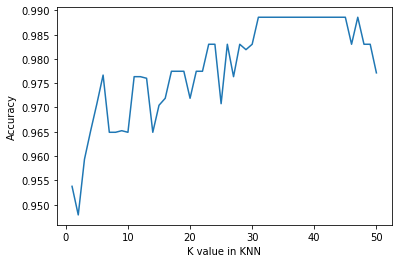

In [40]:
plt.plot(k_range,scores_list)
plt.xlabel("K value in KNN")
plt.ylabel("Accuracy")

### Conclusion

### The best accuarcy for the KNN model from 1 to 50 and 10-fold cross validation is 98.85%
### The accuarcy increases as the value of k increases until a value of 8 and post that the accuarcy keeps varying
### There isnt a substantial difference in accuracy as the value of k increases. The difference being only 3%

#  Model 3 : Naive Bayes Gaussian NB

In [41]:
gnb = GaussianNB()

In [42]:
#Train the model using the training sets
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 1.0


In [45]:
kfold = KFold(n_splits=10, random_state=0)
cv_NB_Gaussian = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')

In [46]:
print(cv_NB_Gaussian)

[1.         1.         0.88235294 0.82352941 0.94117647 1.
 1.         1.         1.         1.        ]


In [47]:
print(np.mean(cv_NB_Gaussian))

0.9647058823529413


###  The accuarcy of the Naive Bayes Gaussion Method is 96.4% (Using 10 fold cross validation)

#  Model 3 : Naive Bayes Multinomial NB

In [48]:
Multi_nb = MultinomialNB()

In [49]:
# Model Accuracy, how often is the classifier correct?
kfold = KFold(n_splits=10, random_state=0)
cv_NB_MultiNominal = cross_val_score(Multi_nb, X, Y, cv=kfold, scoring='accuracy')

In [50]:
print(np.mean(cv_NB_MultiNominal))

0.8382352941176471


In [51]:
print(cv_NB_MultiNominal)

[0.94117647 0.82352941 0.82352941 0.70588235 0.70588235 0.88235294
 1.         0.6875     0.8125     1.        ]


###  The accuarcy of the Naive Bayes MultiNomial Method is 83.82% (Using 10 fold cross validation)

### The performance of the  Gaussian NB model is better than Multinomial NB  with an accuarcy of approx 96% to an accuracy of approx 83%

# Result Summary

## Step 1 Data Pre proccesing - Missing Values were checked , then Outliers were identified nd removed. Post that the Data for all the attribute variables were scaled

### Accuracy of the Models
#### Decision Tree - 97.16%
#### Decision Tree with 10 fold Cross Validation - 87%
#### Random Forest with 10 fold Cross Validation - 97%
#### The 10-fold Random Forest performs better than the 10-fold Decison Tree Model

#### KNN ( N=10 ) - 97.6%

#### The best accuarcy for the KNN model from 1 to 50 and 10-fold cross validation is 98.85%
#### The accuarcy increases as the value of k increases until a value of 8 and post that the accuarcy keeps varying
#### There isnt a substantial difference in accuracy as the value of k increases. The difference being only 3%

#### The accuarcy of the Naive Bayes MultiNomial Method is 83.82% (Using 10 fold cross validation)
#### The accuarcy of the Naive Bayes Gaussion Method is 96.4% (Using 10 fold cross validation)
#### The performance of the  Gaussian NB model is better than Multinomial NB  with an accuarcy of approx 96% to an accuracy of approx 83%
